<a href="https://colab.research.google.com/github/iharshidas/The-Sparks-Foundation-Internship/blob/main/KNN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prediction using Unsupervised ML
**By:** Harshita Das

In [48]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# Importing the modelling libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
# Loading the iris dataset from 
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.shape)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
# Implementing the elbow method to find the optimum number of clusters
x = iris_df.iloc[:, [0, 1, 2, 3]].values

inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  inertia.append(kmeans.inertia_)

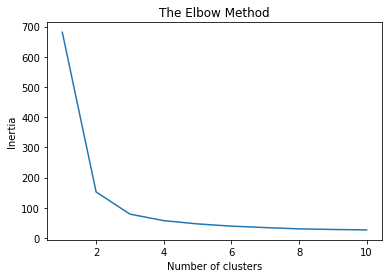

In [51]:
# Plotting the elbow graph
plt.plot(range(1,11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above graph, we choose the cluster value(x-axis) where the decrease in inertia value becomes constant.  
Here, the graph becomes constant after x=3  
Hence, the number of clusters will be 3

In [52]:
# KMeans model for number of cluster=3
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(x)

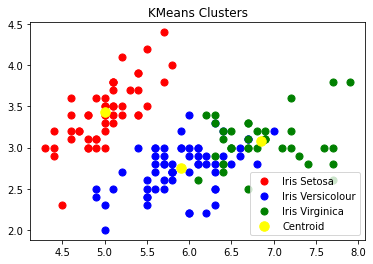

In [53]:
# Visualizing the clusters
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=50, c='red', label='Iris Setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=50, c='blue', label='Iris Versicolour')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=50, c='green', label='Iris Virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=90, c='yellow', label='Centroid')
plt.title('KMeans Clusters')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


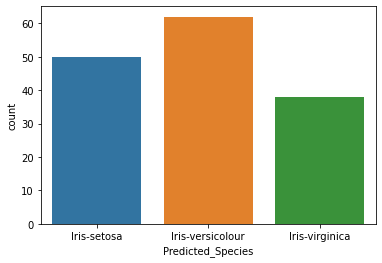

In [54]:
# Counting number of iris of each species
species=['Iris-setosa', 'Iris-versicolour','Iris-virginica']
species_=[]
for i in y_kmeans:
    species_.append(species[i])
iris_df['Predicted_Species']=species_
sns.countplot(iris_df['Predicted_Species'])